# Using Laplace Transforms to solve a linear differential equation in SymPy

Consider solving 

$$3\ddot{x}+30\dot{x}+63x=4\dot{g}(t)+6g(t)$$
where 
$$g(t)=u_s(t)$$
is the unit step function (Heaviside Function)
and $x(0) = 4$ and $\dot{x}(0)=7$. 

In [1]:
%matplotlib inline
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
init_printing(use_unicode=True)

In [2]:
x, g, X = symbols('x g X', cls = Function)

In [3]:
x0 = 4
v0 = 7

In [4]:
g = Heaviside(t) #This is just the step function

In [5]:
laplace_transform(Heaviside(t), t, s) # Checking the performance of the Laplace Transform Module

(1/s, 0, True)

In [6]:
laplace_transform(DiracDelta(t), t, s) # Checking the performance... this is wrong. Should get 1. 

(-Heaviside(0) + 1, -oo, True)

In [20]:
numer(laplace_transform(DiracDelta(t), t, s) )

In [7]:
laplace_transform(DiracDelta(t - 2), t, s) # right result

(exp(-2*s), -oo, True)

In [8]:
laplace_transform(DiracDelta(t - a), t, s)[0] # right result (theta(t) is a Heaviside function representation in SymPy)

In [9]:
laplace_transform(DiracDelta(t - a), t, s)[0].subs(a,2) # Looks good

In [10]:
laplace_transform(DiracDelta(t - a), t, s)[0].subs(a,1) # Looks good

In [11]:
laplace_transform(DiracDelta(t - a), t, s)[0].subs(a,0.0000001) # Looks to converge

In [12]:
laplace_transform(DiracDelta(t - a), t, s)[0].subs(a,-0.0000001) #So... here is the illustration. 

What's happening here is that SymPy currently takes the position that half the diract happens before zero, half after, so the result should only be half as big. I think I'm in a rather large crowd in saying that this isn't proper. It makes some theoretical sense, and is a wonderful math debate. However, given convention says that $\delta(t)$ is fully captured by a Laplace transform with a result of $1$ (Mathematica, Maple, Matlab, every System Dynamics, Controls, and Signal Processing book I've ever read), SymPy is practically wrong. I'm hoping that they will change their minds. I am now a bit skeptical about using SymPy for my math work as the results of a simple conventional application don't match expected behavior consistent with other codes.

So we note that SymPy isn't taking the Laplace Transform properly here, so we need to avoid using this result. (we should have gotten 1) Valid as of 0.7.6.1

In [13]:
print(sympy.__version__)

1.0


The first line below would work if SymPy performed the Laplace Transform of the Dirac Delta correctly. Short of that,
we manually insert the Laplace Transform of $g(t)$ and $\dot{g}(t)$ where $g(t)=u(t)$.

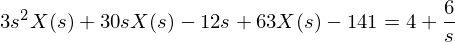

In [14]:
#eom  = Eq(3*(s**2 * X(s)-s*x0-v0)+30 * (s*X(s)-x0)+ 63 * X(s), laplace_transform( 4 * diff(g,t) + 6 * g, t, s, noconds = True))

eom  = Eq(3*(s**2 * X(s)-s*x0-v0)+30 * (s*X(s)-x0)+ 63 * X(s), 4 * 1 + 6 * 1/s)
eom

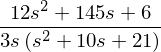

In [15]:
Xofs = solve(eom,X(s))
Xofs[0]

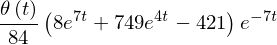

In [16]:
soln = inverse_laplace_transform(Xofs[0],s,t)
soln

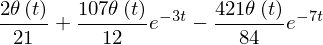

In [17]:
soln_simp = expand(soln)
soln_simp

In [18]:
N(soln_simp,5)

Note that $\theta(t)$ is SymPy's notation for a step function. This simply means the answer can't be used before $t=0$. 